<a href="https://colab.research.google.com/github/evroth/gsb545repo/blob/main/lab5_NeuralNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Neural Networks

Use the neural net package from sci-kit learn to train a model to classify whether or not an observation makes more than 50k.

## The Data

In [55]:
import pandas as pd
df = pd.read_csv("income_evaluation.csv")

In [56]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.describe(include = ['object'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [5]:
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [57]:
# rename columns name
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('-', '_')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

## Exploratory Analysis

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
numeric_columns = ['age', 'capital_gain','capital_loss', 'hours_per_week']
categorical = ['workclass', 'education', 'education_num', 'marital_status','occupation','relationship','race','sex', 'native_country','income']

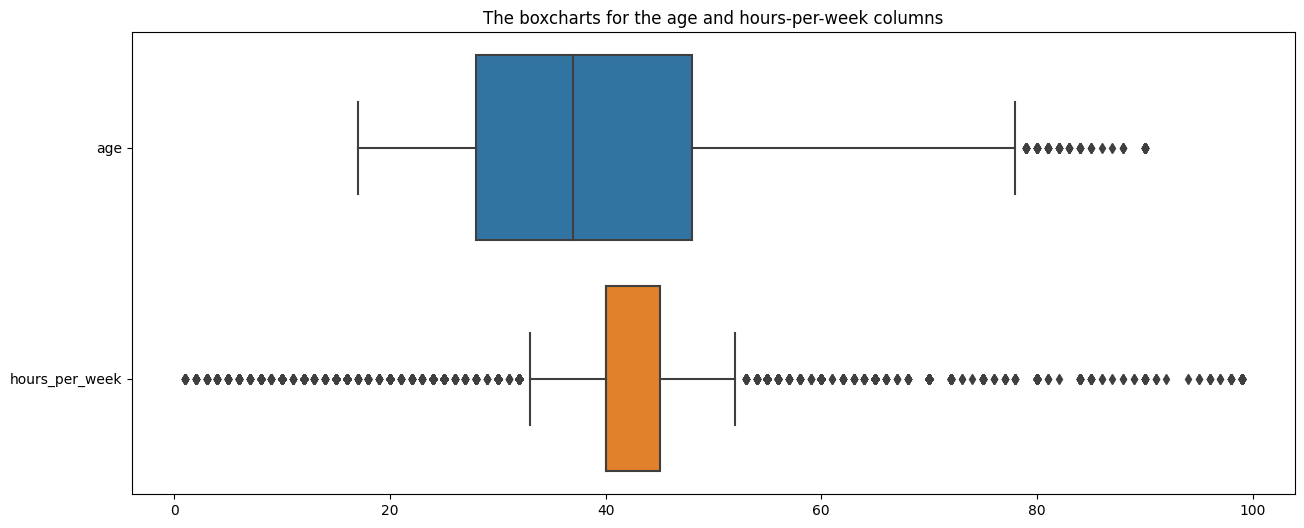

In [26]:
plt.figure(figsize=(15,6))
plt.title(f'The boxcharts for the age and hours-per-week columns')
sns.boxplot( data=df[['age', 'hours_per_week']], orient='h')
plt.show()

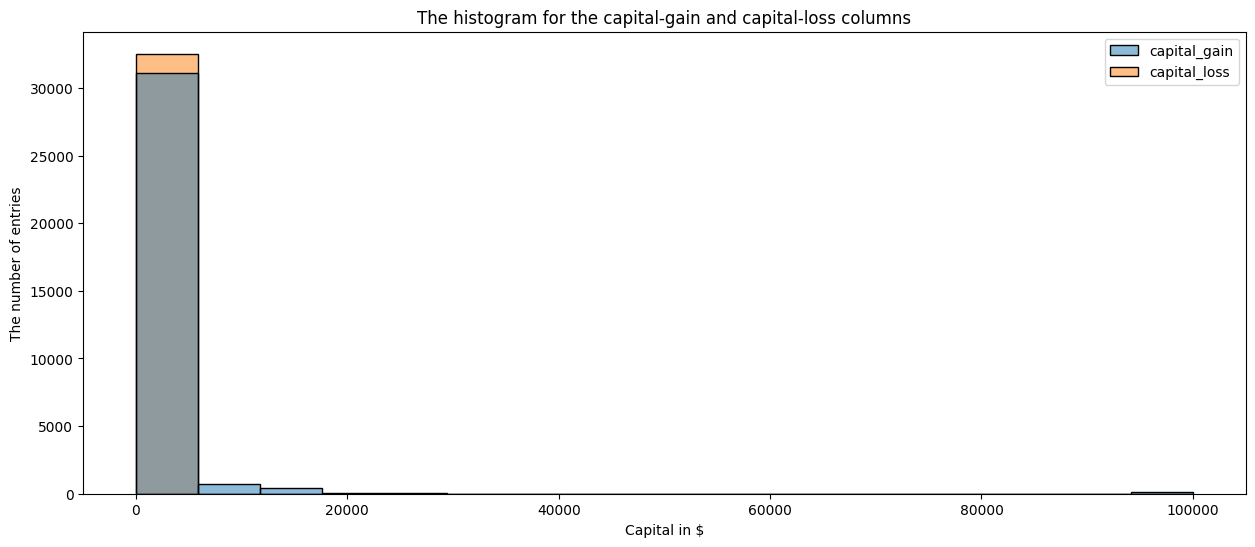

In [27]:
plt.figure(figsize=(15,6))
plt.title(f'The histogram for the capital-gain and capital-loss columns')
sns.histplot( data=df[['capital_gain','capital_loss']])
plt.ylabel('The number of entries')
plt.xlabel('Capital in $')
plt.show()

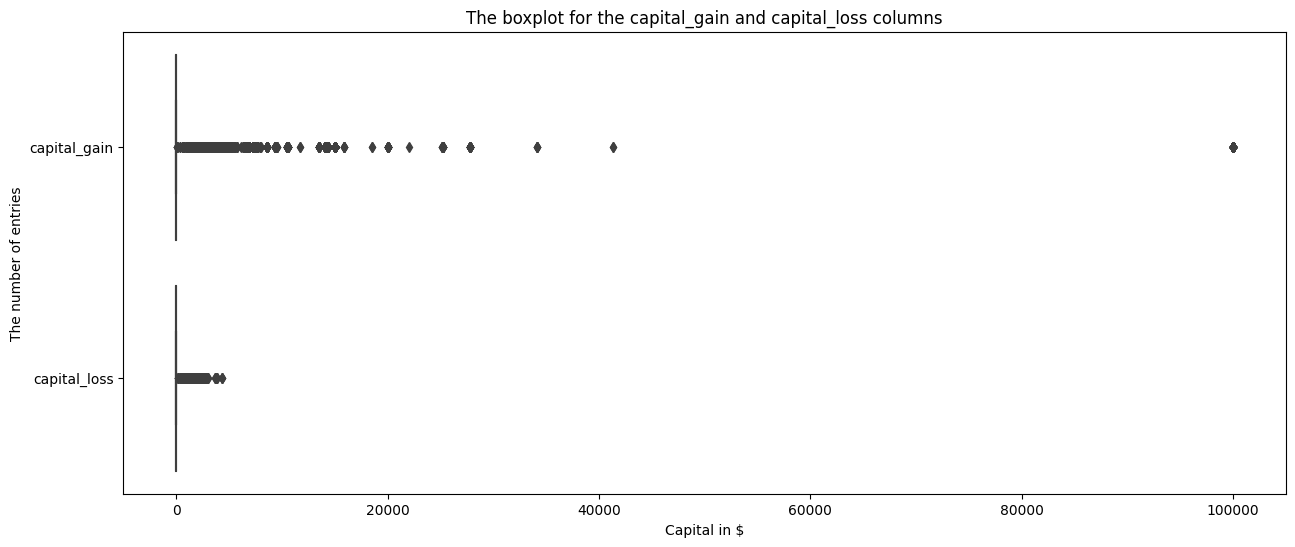

In [29]:
plt.figure(figsize=(15,6))
plt.title(f'The boxplot for the capital_gain and capital_loss columns')
sns.boxplot( data=df[['capital_gain','capital_loss']], orient='h')
plt.ylabel('The number of entries')
plt.xlabel('Capital in $')
plt.show()

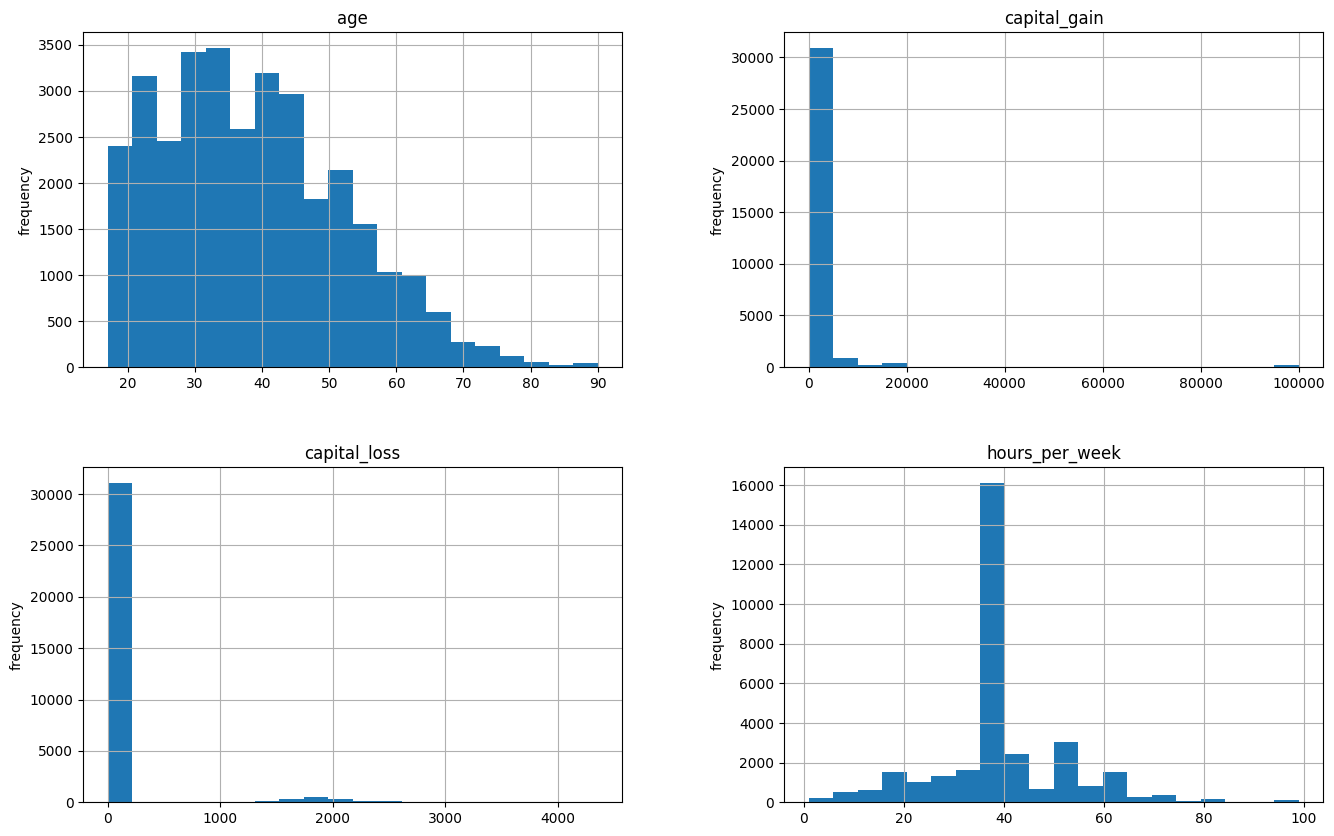

In [33]:
param_graphs = df.hist(numeric_columns, figsize=(16, 10), bins=20,)
for axis in param_graphs.flatten():
    axis.set_ylabel('frequency')
plt.show()

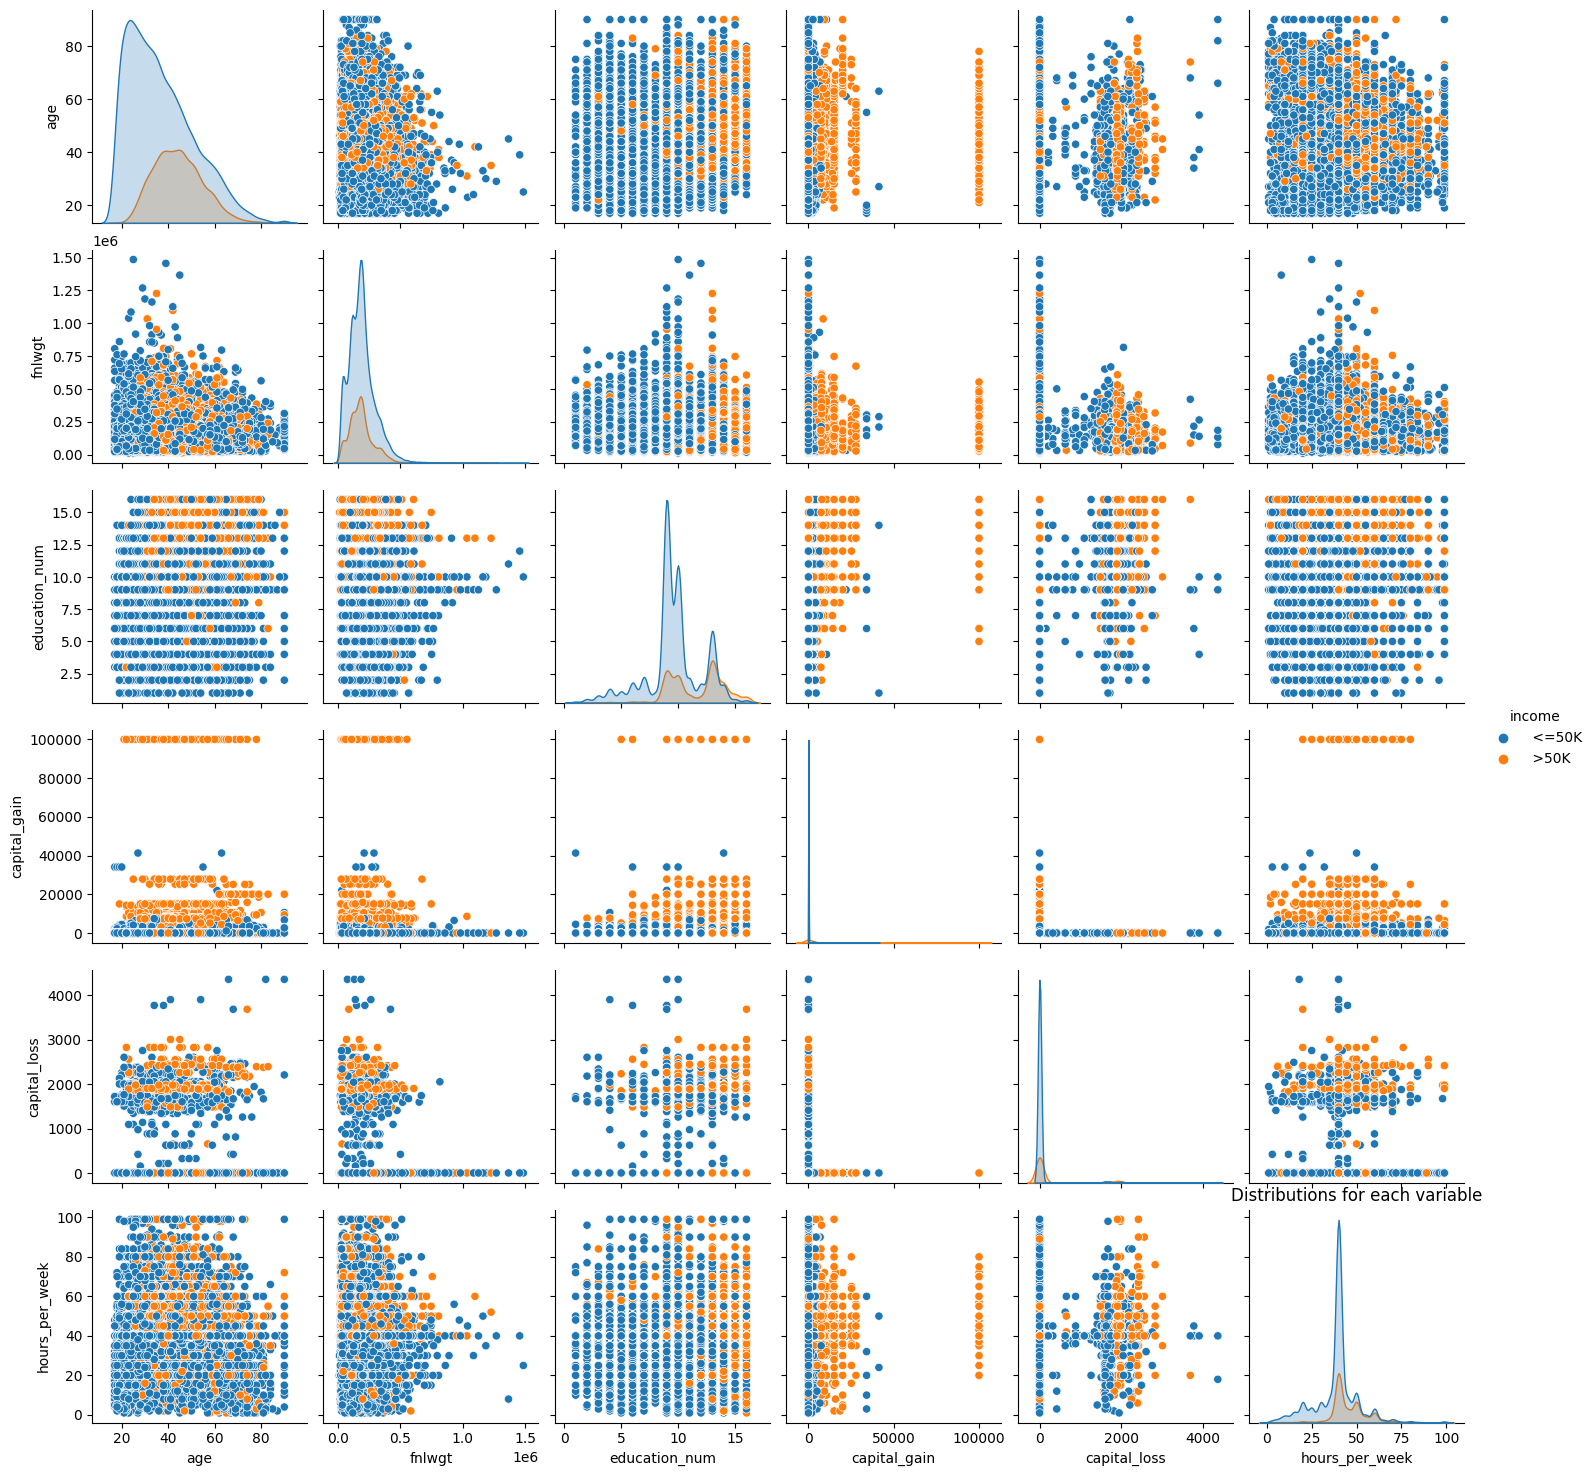

In [34]:
sns.pairplot(data=df, hue="income")
plt.title('Distributions for each variable')
plt.show()

<ipython-input-37-6696113b1465>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


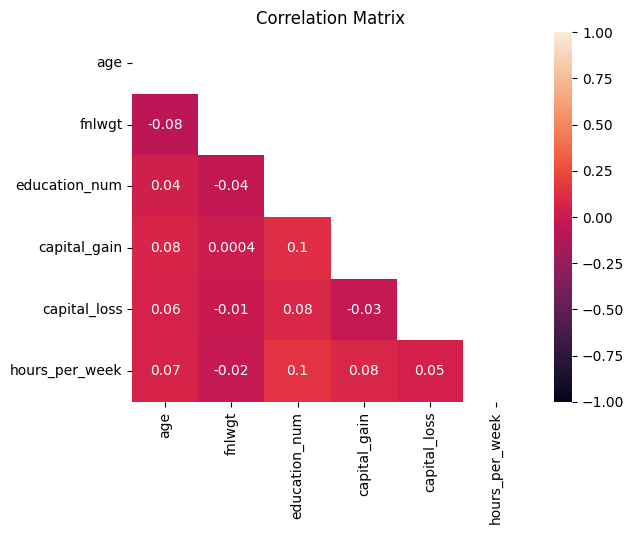

In [37]:
corr = df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, 
            fmt='.1g', annot=True, mask = matrix)

plt.title('Correlation Matrix')
plt.show()

In [58]:
display(df.loc[df.duplicated()].sample(5))

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
30845,46,Private,133616,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
21875,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
26313,28,Private,274679,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K


There are some duplicates in the dataset, they could be distinct observations but I am assuming they are accidental repeates. I will drop duplicates.

In [59]:
df.drop_duplicates(inplace=True)

The columns education and education_num look like they are the same data so I am going to drop one of them.

In [60]:
df = df.drop(columns = ["education_num"])

In [69]:
numeric_columns = ['age', 'capital_gain','capital_loss', 'hours_per_week']
categorical = ['workclass', 'education', 'marital_status','occupation','relationship','race','sex', 'native_country']

## Preprocessing

There is a lot going on in this data, some basic preprocessing should be done to account for variable distributions and catagorical variables.

In [62]:
from sklearn.preprocessing import StandardScaler

In [64]:
# scalling features
numeric_columns = ['age', 'capital_gain','capital_loss', 'fnlwgt', 'hours_per_week']
df_scaled = df[numeric_columns].copy()
# fit scaler on data
scale = StandardScaler().fit(df_scaled)
# transform data
df_scaled = scale.transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=df[numeric_columns].columns)
df_scaled = df_scaled.merge(df[categorical], on=df.index)
df_scaled.drop('key_0', axis = 1, inplace=True)
df_scaled

,age,capital_gain,capital_loss,fnlwgt,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,0.030390,0.148292,-0.216743,-1.063569,-0.035664,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,0.836973,-0.145975,-0.216743,-1.008668,-2.222483,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,-0.042936,-0.145975,-0.216743,0.245040,-0.035664,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,1.056950,-0.145975,-0.216743,0.425752,-0.035664,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,-0.776193,-0.145975,-0.216743,1.408066,-0.035664,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,-0.145975,-0.216743,0.639678,-0.197650,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32533,0.103716,-0.145975,-0.216743,-0.335436,-0.035664,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32534,1.423579,-0.145975,-0.216743,-0.358779,-0.035664,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32535,-1.216148,-0.145975,-0.216743,0.110930,-1.655530,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [71]:
df_final = pd.get_dummies(df_scaled, columns=categorical)

In [75]:
df_final

,age,capital_gain,capital_loss,fnlwgt,hours_per_week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.030390,0.148292,-0.216743,-1.063569,-0.035664,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.836973,-0.145975,-0.216743,-1.008668,-2.222483,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042936,-0.145975,-0.216743,0.245040,-0.035664,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.056950,-0.145975,-0.216743,0.425752,-0.035664,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.776193,-0.145975,-0.216743,1.408066,-0.035664,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,-0.145975,-0.216743,0.639678,-0.197650,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32533,0.103716,-0.145975,-0.216743,-0.335436,-0.035664,>50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32534,1.423579,-0.145975,-0.216743,-0.358779,-0.035664,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32535,-1.216148,-0.145975,-0.216743,0.110930,-1.655530,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Building Models

In [78]:
pip install nnv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
from nnv import NNV

In [76]:
# Separate features and target variable
X = df_final.drop(['income'], axis=1)
y = df_final['income']

In [83]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

**Model 1: Neural Net**




In [86]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an MLPClassifier object
reg = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10000, random_state=42)

# train the neural network using the training data
reg.fit(X_train, y_train)

# evaluate the performance of the neural network on the testing data
score = reg.score(X_test, y_test)
print("R^2: {:.2f}".format(score))

R^2: 0.86


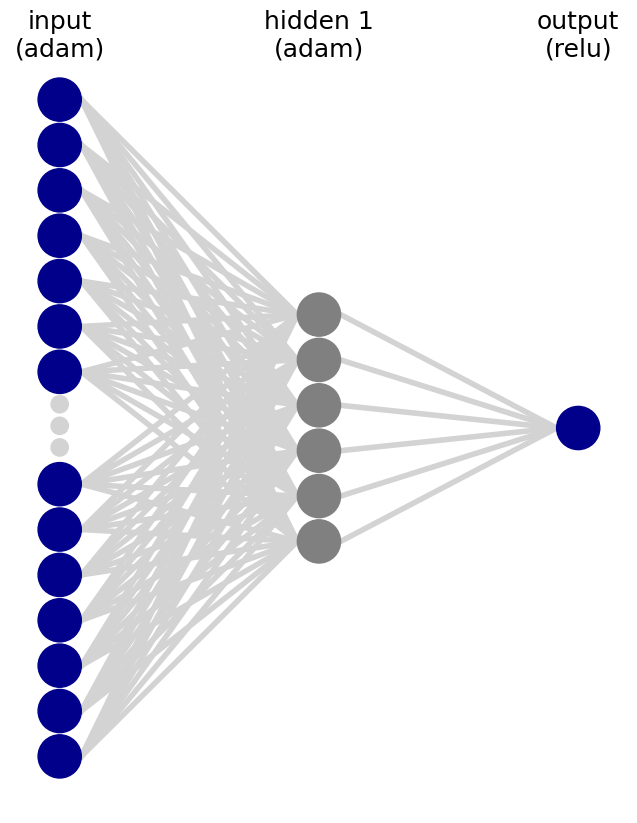

(<Figure size 20000x1000 with 1 Axes>, <Axes: >)

In [109]:
plt.rcParams["figure.figsize"] = (200,10)

layers_list = [
    {"title":"input\n(adam)", "units": 107, "color": "darkBlue"},
    {"title":"hidden 1\n(adam)", "units": 6},
    {"title":"output\n(relu)", "units": 1,"color": "darkBlue"},
]

NNV(layers_list, max_num_nodes_visible=14, node_radius=10, spacing_layer=100).render()

This first model gave us an R^2 of .86, which I believe is not too bad. It could be beneficial to look at a different metric such as RMSE or Adjusted R^2 since there are multiple explanatory variables and R^2 can never go down. I don't know the exact translation of that principle to neural nets but I am sure it is similar and R^2 can still provide good comparison when we use the same number of predictors in each model.

**Model 2: Neural Net**

In [89]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an MLPClassifier object
reg = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42)

# train the neural network using the training data
reg.fit(X_train, y_train)

# evaluate the performance of the neural network on the testing data
score = reg.score(X_test, y_test)
print("R^2: {:.2f}".format(score))

R^2: 0.83


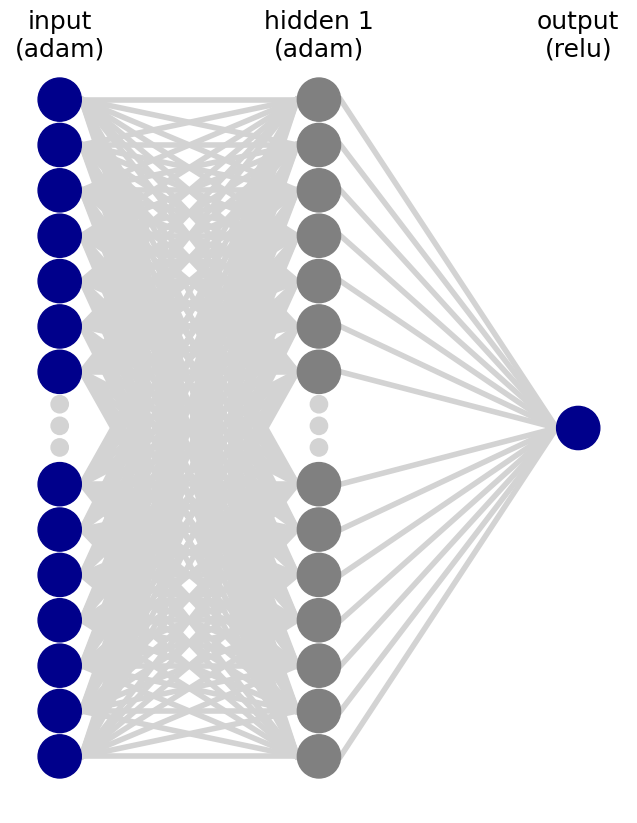

(<Figure size 20000x1000 with 1 Axes>, <Axes: >)

In [108]:
plt.rcParams["figure.figsize"] = (200,10)

layers_list = [
    {"title":"input\n(adam)", "units": 107, "color": "darkBlue"},
    {"title":"hidden 1\n(adam)", "units": 100},
    {"title":"output\n(relu)", "units": 1,"color": "darkBlue"},
]

NNV(layers_list, max_num_nodes_visible=14, node_radius=10, spacing_layer=100).render()

This NN with 100 nodes in the first and only hidden layer had worse performance when compared to the first model. This one here only had a .83 R^2. I believe XGBoost will still be the best model we can build on this data since it usually performs the best and NN can be complex to tune, with many possible dimensions you can make tweaks to.

**Model 3: Neural Net**


In [107]:
# create an MLPClassifier object
reg = MLPClassifier(hidden_layer_sizes=(10,), activation = 'logistic', solver = 'sgd', max_iter=10000, random_state=42)

# train the neural network using the training data
reg.fit(X_train, y_train)

# evaluate the performance of the neural network on the testing data
score = reg.score(X_test, y_test)
print("R^2: {:.2f}".format(score))

R^2: 0.85


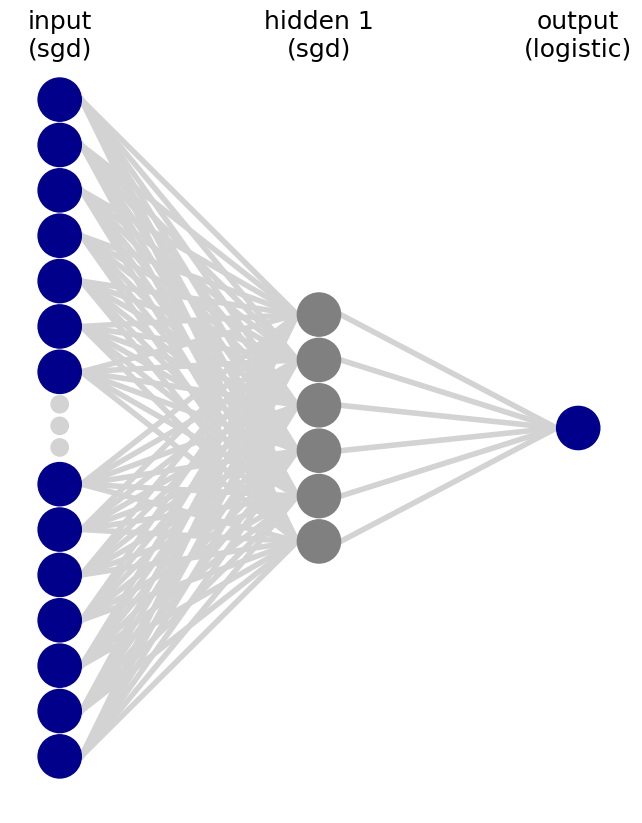

(<Figure size 20000x1000 with 1 Axes>, <Axes: >)

In [110]:
plt.rcParams["figure.figsize"] = (200,10)

layers_list = [
    {"title":"input\n(sgd)", "units": 107, "color": "darkBlue"},
    {"title":"hidden 1\n(sgd)", "units": 6},
    {"title":"output\n(logistic)", "units": 1,"color": "darkBlue"},
]

NNV(layers_list, max_num_nodes_visible=14, node_radius=10, spacing_layer=100).render()

I keep trying to play around with different parameters like activation and solver, on top of the nodes in the hidden units. Nothing I do has been able to outperform .86; I have also not been able to build anything that tanks the model below .8

**Model 4: XGBoost**

In [112]:
from xgboost import XGBClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [116]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df_final['income'])

In [117]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the model
model = XGBClassifier()

# train the neural network using the training data
model.fit(X_train, y_train)

# evaluate the performance of the neural network on the testing data
score = model.score(X_test, y_test)
print("R^2: {:.2f}".format(score))

R^2: 0.87


This R^2 is the best of any model yet in this lab. The R^2 .87 means that 87% of the variation in the outcome variable is explained by the model. Lets use a different metric to analyze this models performance, like ROC AUC.

In [118]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [119]:
# define the model
model = XGBClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('ROC Area Under Curve: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ROC Area Under Curve: 0.927 (0.003)


This cross validated ROC AUC score of .927 tells us that the model does a really good job at classifying whether an observation will have an income <=50k or >50k. 

**Compare to the ROC AUC of the best NN model, Model 1**

In [120]:
# best NN Model
reg = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10000, random_state=42)
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(reg, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('ROC Area Under Curve: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ROC Area Under Curve: 0.909 (0.004)


The best NN from Model 1, has an ROC AUC of .909, which lags the XGBoost model by a few percentage points. Though I would say still does a good job at classifying correctly.

## Conclusion

To wrap up this analysis, although we were able to create a few NN that perform well at classifying targets correctly, they were not as successful or acurate as the XGBoost model. This XGBoost model had an R^2 of .87 (.01 higher than the best NN) and an ROC AUC of .927 (about .02 higher than the NN).

While the NN models lagged in performance compared to the boosted model, how the data is cleaned and preprocessed could play a big role in model performance. Perhaps if different scaling or labeling for categorical variables were performed, the outcome could have been much different- for better or for worse. I believe the proper SOP's were followed here in this lab but it is always up for discussion. Hyper tuning and changing other model perameters could also work to improve each NN's performance.

In the future, I would keep using XGBoost to evaluate how well models perform, since throughout this class, those models have been outperforming anything else I have built. They can be a good gauge to if a different model is doing well.